In [1]:
import pandas as pd
import seaborn as sns


data = {'Year': [1920,1930,1940,1950,1960,1970,1980,1990,2000,2010],
        'Unemployment_Rate': [9.8,12,8,7.2,6.9,7,6.5,6.2,5.5,6.3]
       }
  
df = pd.DataFrame(data=data)


<AxesSubplot:xlabel='Year', ylabel='Unemployment_Rate'>

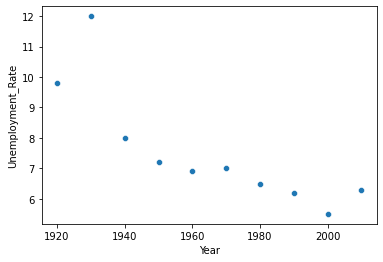

In [2]:
sns.scatterplot(data=df, x="Year", y="Unemployment_Rate")


<AxesSubplot:xlabel='Year'>

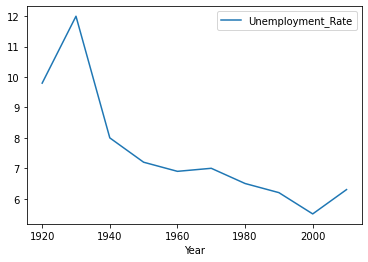

In [3]:
df.plot(x ='Year', y='Unemployment_Rate', kind = 'line')

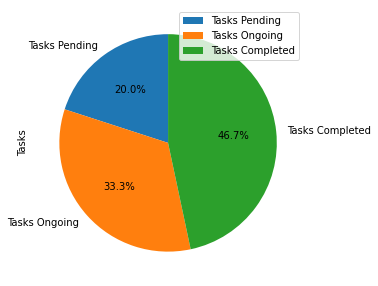

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data2 = {'Tasks': [300,500,700]}
df2 = pd.DataFrame(data2, index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])

df2.plot.pie(y='Tasks',figsize=(5, 5),autopct='%1.1f%%', startangle=90)
plt.show()

In [5]:
jsonData = {"Product":{"0":"Desktop Computer","1":"Tablet","2":"iPhone","3":"Laptop"},"Price":{"0":700,"1":250,"2":800,"3":1200}}
dfJson = pd.DataFrame(data=jsonData)
dfJson

,Product,Price
0,Desktop Computer,700
1,Tablet,250
2,iPhone,800
3,Laptop,1200


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

all_scores = pd.DataFrame(np.zeros((len(models), 2)))
all_scores.columns = ["train score", "test score"]
all_scores.index = [name for name, model in models]

train_score_acc = []
test_score_acc  = []

for name, model in models:
    model.fit(X_train, y_train)
    
    xtrain_pred = model.predict(X_train)
    xtrain_accur = accuracy_score(y_train, xtrain_pred)
    
    xtest_pred = model.predict(X_test)
    xtest_accur = accuracy_score(y_test, xtest_pred)
    
    train_score_acc.append(round(xtrain_accur, 2))
    test_score_acc.append(round(xtest_accur, 2))
    
    
all_scores["train score"] = train_score_acc
all_scores["test score"] = test_score_acc

all_scores

/Users/tesfalemhaile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,train score,test score
LR,0.98,0.98
KNN,0.95,1.00
SVM,0.97,0.98


In [49]:
from sklearn.model_selection import KFold

model = LogisticRegression()
kf = KFold(n_splits=5)


def score_box(model, X1_train, X1_test, y1_train, y1_test):
    
    model.fit(X1_train, y1_train)
    sco = model.score(X1_test, y1_test)
    return sco


# i am looping through the iris.data to split into feature and target
# then i am getting the index of all the feature and target
# then i am getting the feature and target by the its index

SVCacc_score = []
KNNacc_score = [] 
LGacc_score = []

for train_ix, test_ix in kf.split(iris.data):
    
    X1_train, X1_test, y1_train, y1_test  = iris.data[train_ix], iris.data[test_ix], iris.target[train_ix], iris.target[test_ix]
    SVCacc_score.append(score_box(SVC(), X1_train, X1_test, y1_train, y1_test))
    LGacc_score.append(score_box(LogisticRegression(), X1_train, X1_test, y1_train, y1_test))
    KNNacc_score.append(score_box(KNeighborsClassifier(), X1_train, X1_test, y1_train, y1_test))
    
print(SVCacc_score, KNNacc_score, LGacc_score)


[1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.7] [1.0, 1.0, 0.8333333333333334, 0.9333333333333333, 0.8] [1.0, 1.0, 0.8666666666666667, 0.9333333333333333, 0.8333333333333334]


/Users/tesfalemhaile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tesfalemhaile/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(), iris.data, iris.target)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [8]:
cross_val_score(KNeighborsClassifier(), iris.data, iris.target)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])